# Sentiment Classification

In [3]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train

--2023-03-11 01:03:09--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447555 (437K) [text/plain]
Saving to: ‘sentiment_train’

sentiment_train     100%[===================>] 437.07K   780KB/s    in 0.6s    

2023-03-11 01:03:10 (780 KB/s) - ‘sentiment_train’ saved [447555/447555]



In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('sentiment_train',delimiter='\t')
#train_df.head()

# Data info

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


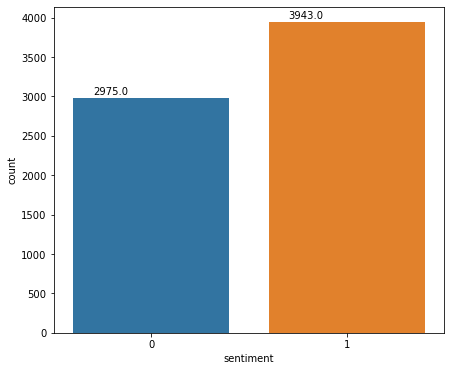

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,6))

ax = sns.countplot(x='sentiment',data=train_df)
# Annotation
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

# Text preprocessing

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out() # vocabulary
print(f"Total length of vocabulory is {len(features)}, examples are {features[:20]}")

Total length of vocabulory is 2132, examples are ['00' '007' '10' '10pm' '12' '16' '17' '1984' '1st' '200' '2007' '286'
 '2nd' '30' '31st' '33' '3333' '385' '50' '517']


In [5]:
train_df_features = cv.transform(train_df['text'])

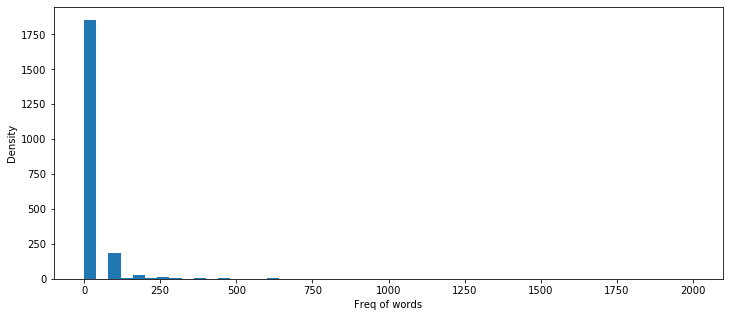

In [9]:
feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

plt.figure(figsize=(12,5))
plt.hist(feature_count_df.counts, bins=50, range=(0,2000))
plt.xlabel('Freq of words')
plt.ylabel('Density')
plt.show()

In [10]:
feature_count_df[feature_count_df['counts']==1]

,features,counts
0,00,1
1,007,1
3,10pm,1
4,12,1
5,16,1
...,...,...
2125,younger,1
2127,yuck,1
2128,yuh,1
2129,zach,1


#removing lower frequency words

In [11]:
cv = CountVectorizer(max_features=1000)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulory is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10)

Total length of vocabulory is 1000, examples are ['10' '17' '33' '6th' 'aaron']


,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


# Removing the Stop Words

In [12]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words

In [13]:
my_stop_words = my_stop_words.union(['harry','potter','code','vinci','mountain','movie','movies','da'])

In [14]:
cv = CountVectorizer(max_features=1000, stop_words = my_stop_words)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulory is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10)

Total length of vocabulory is 1000, examples are ['00' '10' '17' '33' '6th']


,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


# Stemming & Lemmatization

In [15]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

analyzer = CountVectorizer().build_analyzer()

def stem_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop = [ word for word in list(set(stemmed_words) - set(my_stop_words))]
  return non_stop

In [16]:
cv = CountVectorizer(max_features=1000, analyzer=stem_words)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulory is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10)

Total length of vocabulory is 1000, examples are ['10' '17' '33' '6th' 'abl']


,features,counts
80,brokeback,1930
297,harri,1916
407,love,1837
803,suck,1378
922,wa,1142
43,awesom,1116
345,imposs,1090
433,mission,1090
439,movi,1052
393,like,823


# Distribution of words across various sentiments

In [17]:
train_df3 = pd.DataFrame(train_df_features.todense(), columns=features)
train_df3['sentiment'] = train_df['sentiment']

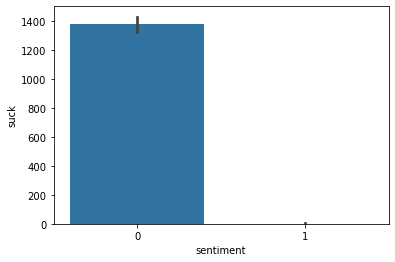

In [18]:
sns.barplot(x='sentiment',y='suck',data=train_df3, estimator=sum)
plt.show()

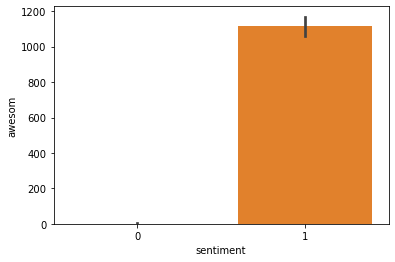

In [19]:
sns.barplot(x='sentiment',y='awesom',data=train_df3, estimator=sum)
plt.show()

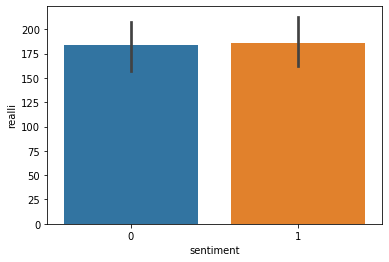

In [20]:
sns.barplot(x='sentiment',y='realli',data=train_df3, estimator=sum)
plt.show()

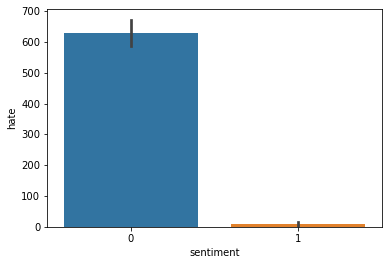

In [21]:
sns.barplot(x='sentiment',y='hate',data=train_df3, estimator=sum)
plt.show()

# Naive Bayes Model

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

In [23]:
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
bernoulli.fit(X_train,y_train)

BernoulliNB()

In [24]:
y_pred = bernoulli.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



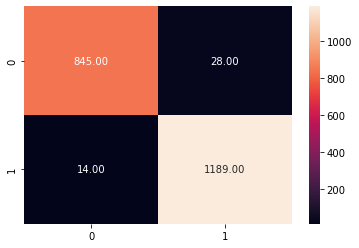

In [27]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = '.2f')

# TF IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=stem_words, max_features=1000)
feature_vector = tfidf.fit(train_df['text'])
train_df_features = tfidf.transform(train_df['text'])
features = feature_vector.get_feature_names_out()

In [29]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

gaussian = GaussianNB()
gaussian.fit(X_train.toarray(),y_train)

y_pred = gaussian.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       873
           1       0.97      0.97      0.97      1203

    accuracy                           0.97      2076
   macro avg       0.97      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076



# Using of n-Grams

In [30]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()

def get_stemmed_tokens(document):
  all_tokens = [word for word in nltk.tokenize.word_tokenize(document)]
  clean_text = []

  for each_token in all_tokens:
    if re.search('[a-zA-Z]',each_token):
      clean_text.append(each_token)
  stem_token = [stemmer.stem(t) for t in clean_text]
  return stem_token

In [31]:
import nltk
nltk.download('punkt')

tfidf = TfidfVectorizer(tokenizer=get_stemmed_tokens, max_features=700, stop_words=my_stop_words, ngram_range=(1,2))
feature_vector = tfidf.fit(train_df['text'])
train_df_features = tfidf.transform(train_df['text'])
features = feature_vector.get_feature_names_out()

[nltk_data] Error loading punkt: <urlopen error [Errno 104] Connection
[nltk_data]     reset by peer>
/home/shivshakti/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/shivshakti/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'harri', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'movi', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 

In [32]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

gaussian = GaussianNB()
gaussian.fit(X_train.toarray(),y_train)

y_pred = gaussian.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       873
           1       0.97      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.97      0.98      2076
weighted avg       0.98      0.98      0.98      2076

